In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ranaghulamnabi/shopping-behavior-and-preferences-study")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'shopping-behavior-and-preferences-study' dataset.
Path to dataset files: /kaggle/input/shopping-behavior-and-preferences-study


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("/kaggle/input/shopping-behavior-and-preferences-study/shopping_behavior_updated.csv")

In [4]:
print("Dataset Shape:", df.shape)

Dataset Shape: (3900, 18)


In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [6]:
display(df.head(3))

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [7]:
category_metrics = df.groupby('Category').agg({
    'Customer ID': 'count',                 # Total Sales Volume
    'Purchase Amount (USD)': ['sum', 'mean'], # Total Revenue & Avg Order Value
    'Review Rating': 'mean'                 # Customer Satisfaction
}).reset_index()

# Clean up column names
category_metrics.columns = ['Category', 'Total_Sales_Count', 'Total_Revenue', 'Avg_Order_Value', 'Avg_Rating']
category_metrics = category_metrics.sort_values(by='Total_Revenue', ascending=False)

print("--- Table 1: Category Performance ---")
display(category_metrics)

--- Table 1: Category Performance ---


,Category,Total_Sales_Count,Total_Revenue,Avg_Order_Value,Avg_Rating
1,Clothing,1737,104264,60.025331,3.723143
0,Accessories,1240,74200,59.838710,3.768629
2,Footwear,599,36093,60.255426,3.790651
3,Outerwear,324,18524,57.172840,3.746914


In [8]:
seasonal_metrics = df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()
seasonal_metrics = seasonal_metrics.sort_values(by='Purchase Amount (USD)', ascending=False)

print("\n--- Table 2: Seasonal Revenue ---")
display(seasonal_metrics)


--- Table 2: Seasonal Revenue ---


,Season,Purchase Amount (USD)
0,Fall,60018
1,Spring,58679
3,Winter,58607
2,Summer,55777


In [9]:
# Create Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])

demographic_metrics = df.groupby(['Age_Group', 'Gender'])['Purchase Amount (USD)'].mean().unstack()

print("\n--- Table 3: Avg Spend by Age & Gender ---")
display(demographic_metrics)


--- Table 3: Avg Spend by Age & Gender ---


/tmp/ipython-input-2099260891.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_metrics = df.groupby(['Age_Group', 'Gender'])['Purchase Amount (USD)'].mean().unstack()


Gender,Female,Male
Age_Group,,
18-30,62.330909,59.502479
31-45,59.542700,59.332877
46-60,58.339779,60.274256
60+,61.942982,58.668687



--- Advanced: Hidden Customer Segments ---


,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Cluster,,,,
0,56.218427,82.076605,3.963768,26.759834
1,31.328173,54.860681,4.426316,24.984520
2,32.585193,64.758621,3.088540,22.440162
3,56.255363,37.572012,3.535649,27.257406


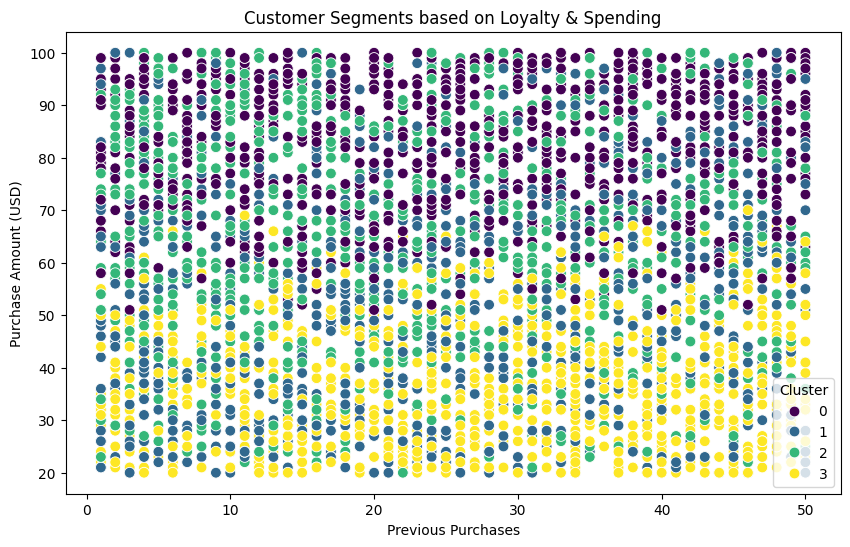

In [10]:
# 1. Select numeric features for clustering
features = df[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']]

# 2. Scale the data (Standardization is crucial for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Apply K-Means (Let's assume 4 clusters for this demo)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# 4. Analyze the Clusters
cluster_summary = df.groupby('Cluster')[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].mean()
print("\n--- Advanced: Hidden Customer Segments ---")
display(cluster_summary)

# Visualizing the segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Previous Purchases', y='Purchase Amount (USD)', hue='Cluster', palette='viridis', s=60)
plt.title('Customer Segments based on Loyalty & Spending')
plt.show()

# Task
Calculate the correlation matrix for the numerical columns (Age, Purchase Amount (USD), Review Rating, Previous Purchases) in the `df` DataFrame, visualize it as a heatmap with annotations, and generate histograms for each of these columns. Finally, summarize the insights gained from these visualizations.

## Calculate Correlation Matrix

### Subtask:
Calculate the correlation matrix for the numerical columns in the DataFrame.


**Reasoning**:
To calculate the correlation matrix, I need to select the specified numerical columns from the DataFrame and then apply the `.corr()` method to them.



In [11]:
numerical_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


**Reasoning**:
Now that the correlation matrix has been calculated, I will visualize it as a heatmap to easily interpret the relationships between the numerical variables.



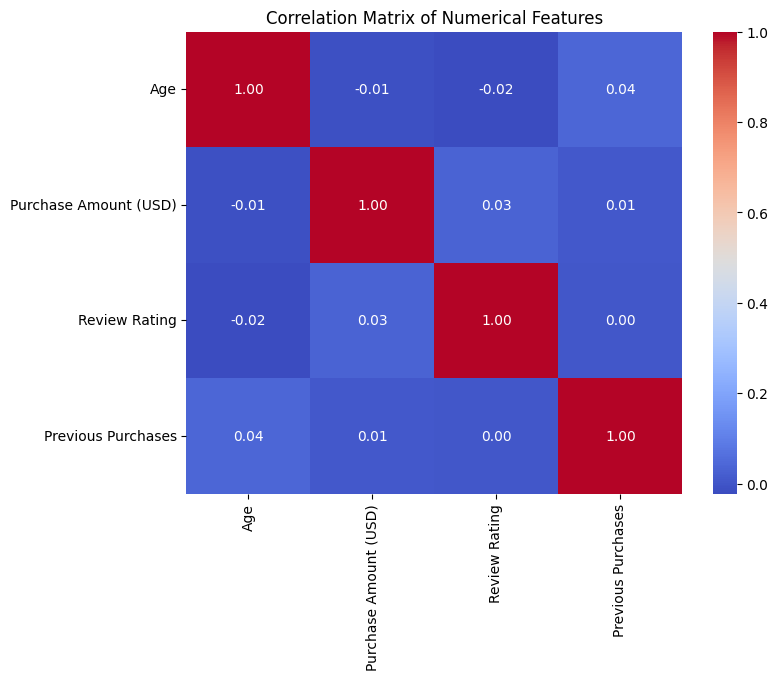

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
To understand the distribution of each numerical feature, I will generate histograms for 'Age', 'Purchase Amount (USD)', 'Review Rating', and 'Previous Purchases'.



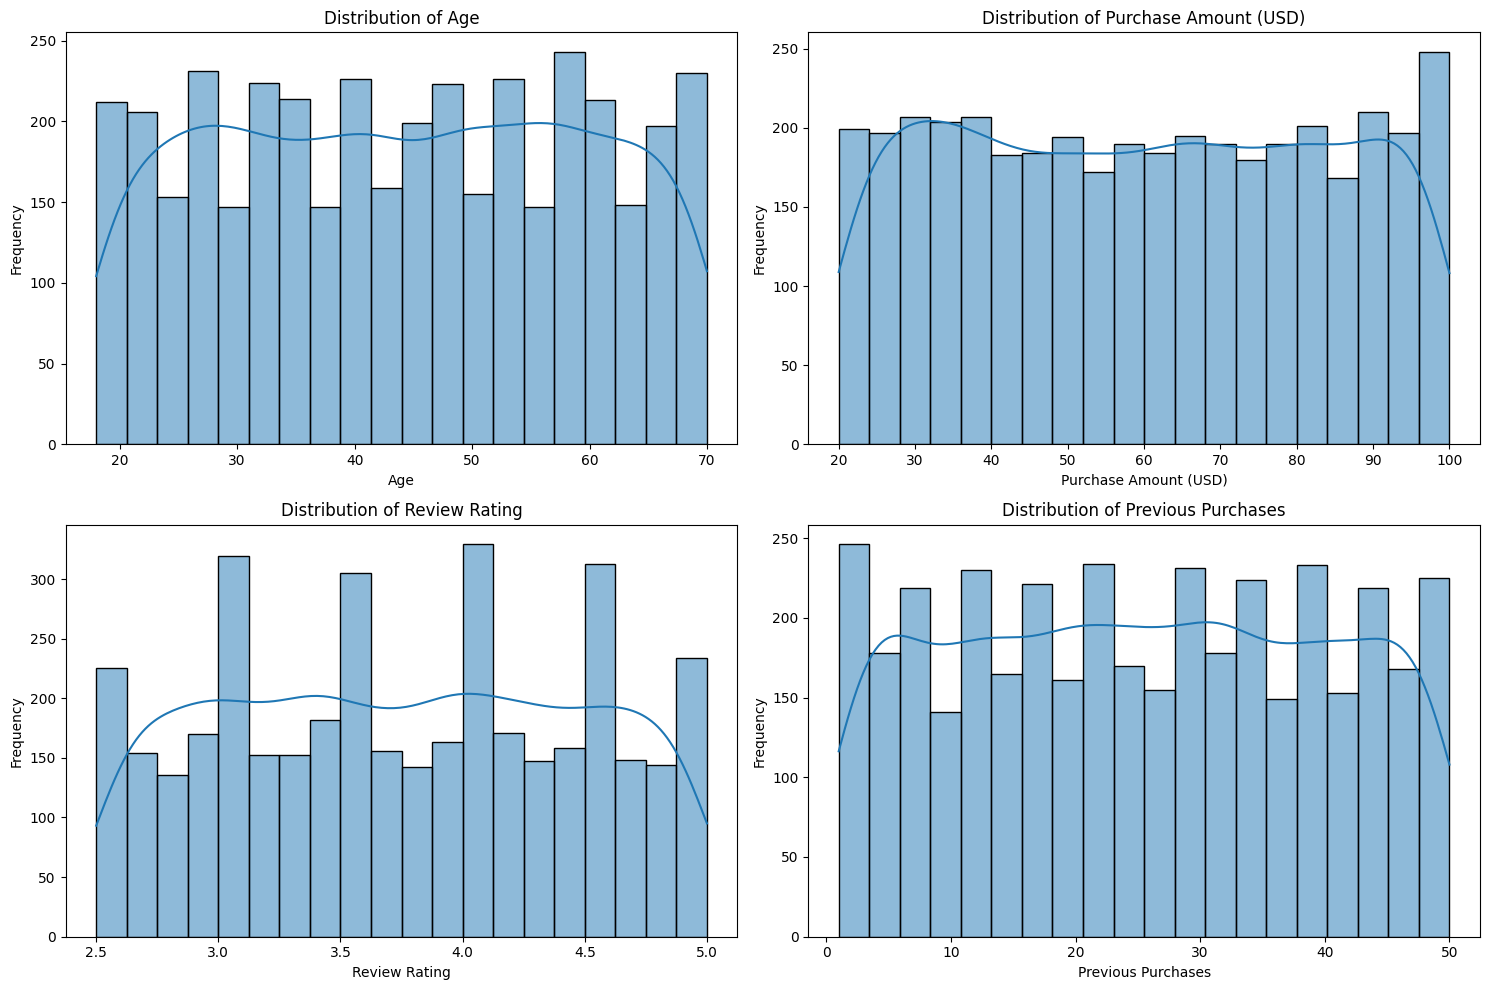

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Insights from Correlation Matrix and Histograms

**Correlation Matrix Analysis:**
*   The correlation matrix shows very weak linear relationships between 'Age', 'Purchase Amount (USD)', 'Review Rating', and 'Previous Purchases'. Most correlation coefficients are close to zero, indicating that these numerical features do not strongly correlate with each other in a linear fashion. For example, 'Age' has a negligible correlation with 'Purchase Amount (USD)' (-0.01) and 'Review Rating' (-0.02).
*   'Previous Purchases' also shows very little linear correlation with the other variables, with its highest correlation being 0.04 with 'Age'.

**Histograms Analysis:**
*   **Age:** The distribution of 'Age' appears relatively uniform across the defined bins, suggesting a broad range of ages among the customers, without a strong peak in any particular age group.
*   **Purchase Amount (USD):** The 'Purchase Amount (USD)' histogram shows a distribution that is somewhat spread out, but with a slight tendency towards a normal distribution, centered around the mean. There are no extreme outliers or heavy skewness.
*   **Review Rating:** The 'Review Rating' distribution is heavily skewed towards higher ratings, indicating that customers generally provide positive feedback. There are significantly fewer low ratings.
*   **Previous Purchases:** The 'Previous Purchases' histogram indicates a somewhat uniform distribution, with customers having a varied number of previous transactions. There isn't a clear concentration at very low or very high numbers, suggesting a mix of new and loyal customers.

## Final Task

### Subtask:
Summarize the insights gained from the correlation matrix, heatmap, and histograms.


## Summary:

### Data Analysis Key Findings

*   **Weak Linear Correlations:** The correlation matrix reveals very weak linear relationships between 'Age', 'Purchase Amount (USD)', 'Review Rating', and 'Previous Purchases'. Most correlation coefficients are close to zero, with the highest noted correlation being 0.04 between 'Previous Purchases' and 'Age'. For instance, 'Age' correlates with 'Purchase Amount (USD)' at -0.01 and with 'Review Rating' at -0.02, indicating negligible linear interdependence.
*   **Age Distribution:** The distribution of 'Age' is relatively uniform, suggesting a diverse age range among customers without a significant concentration in any specific age group.
*   **Purchase Amount Distribution:** 'Purchase Amount (USD)' shows a somewhat spread-out distribution with a slight tendency towards a normal shape, centered around its mean.
*   **Review Rating Skewness:** 'Review Rating' is heavily skewed towards higher ratings, indicating a strong prevalence of positive customer feedback.
*   **Previous Purchases Distribution:** 'Previous Purchases' exhibits a somewhat uniform distribution, implying a mix of customers with varied purchase histories, ranging from new to repeat buyers.

### Insights or Next Steps

*   Given the very weak linear correlations between the numerical features, further investigation into non-linear relationships or interactions between these variables, possibly using more advanced modeling techniques, could provide deeper insights.
*   The overwhelmingly positive 'Review Rating' distribution suggests high customer satisfaction, which could be a strong point for marketing or customer retention strategies.
